In [1]:
from google.colab import files

uploaded = files.upload()

Saving hungary_chickenpox_st.csv to hungary_chickenpox_st.csv


In [2]:
import pandas as pd
data = pd.read_csv('hungary_chickenpox_st.csv')
data.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


Data Preprocessing

In [5]:
# Check data types and missing values
data_info = data.info()
missing_values = data.isnull().sum()

data_info, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

(None,
 Date        0
 BUDAPEST    0
 BARANYA     0
 BACS        0
 BEKES       0
 BORSOD      0
 CSONGRAD    0
 FEJER       0
 GYOR        0
 HAJDU       0
 HEVES       0
 JASZ        0
 KOMAROM     0
 NOGRAD      0
 PEST        0
 SOMOGY      0
 SZABOLCS    0
 TOLNA       0
 VAS         0
 VESZPREM    0
 ZALA        0
 dtype: int64)

In [6]:
# Convert "Date" column to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Generate descriptive statistics
descriptive_stats = data.describe(include='all', datetime_is_numeric=True)

descriptive_stats


,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
count,522,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,...,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,2009-12-31 12:00:00,101.245211,34.204981,37.166667,28.911877,57.082375,31.488506,33.272031,41.436782,47.097701,...,40.869732,25.643678,21.850575,86.101533,27.609195,29.854406,20.352490,22.467433,40.636015,19.873563
min,2005-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007-07-03 18:00:00,34.250000,8.000000,8.000000,4.000000,14.250000,6.000000,7.000000,9.000000,11.000000,...,10.000000,6.000000,4.000000,28.250000,6.000000,6.000000,4.000000,3.000000,7.250000,4.000000
50%,2009-12-31 12:00:00,93.000000,25.000000,29.500000,14.000000,46.500000,20.500000,24.000000,35.000000,37.000000,...,31.000000,19.000000,15.000000,81.000000,20.500000,18.500000,12.000000,13.000000,32.000000,13.000000
75%,2012-06-30 06:00:00,149.000000,51.000000,53.000000,38.750000,83.750000,47.000000,51.750000,63.000000,68.000000,...,61.750000,39.000000,32.750000,129.750000,41.000000,45.000000,29.000000,34.000000,59.000000,31.000000
max,2014-12-29 00:00:00,479.000000,194.000000,274.000000,271.000000,355.000000,199.000000,164.000000,181.000000,262.000000,...,224.000000,160.000000,112.000000,431.000000,155.000000,203.000000,131.000000,141.000000,230.000000,216.000000
std,NaN,76.354872,32.567222,36.843095,37.618092,50.725437,33.790208,31.397989,36.014297,44.610836,...,37.283299,24.467995,22.025999,66.773741,26.724236,31.814630,23.273025,25.006638,40.699471,21.999636


Visualization for EDA

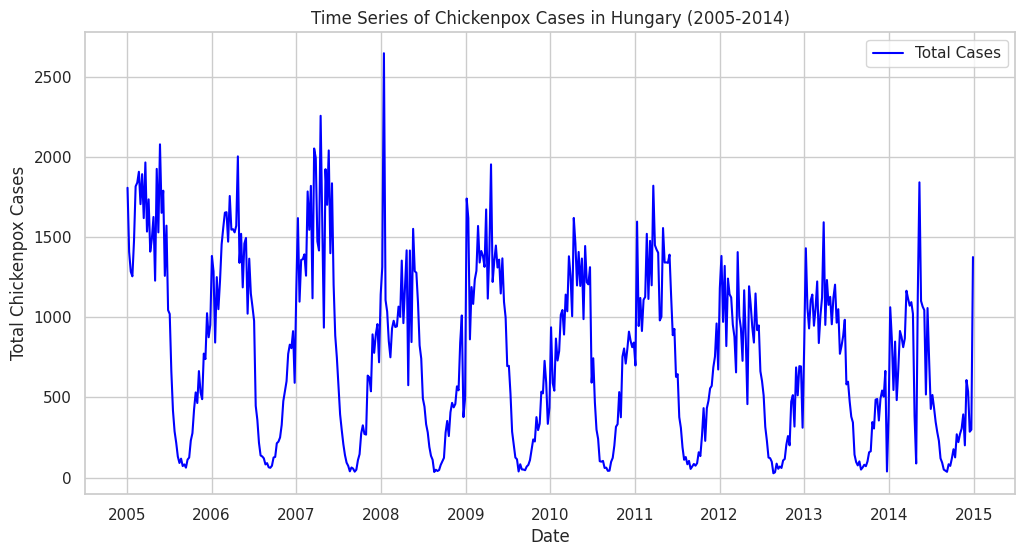

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a time series plot for the total chickenpox cases across all counties
data.set_index('Date', inplace=True)
data['Total'] = data.sum(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total'], label='Total Cases', color='blue')
plt.title('Time Series of Chickenpox Cases in Hungary (2005-2014)')
plt.xlabel('Date')
plt.ylabel('Total Chickenpox Cases')
plt.legend()
plt.show()


**Time Series Observations**

* There is a clear seasonal pattern, with peaks in chickenpox cases occurring annually.
* The peaks are typically sharp and short-lived, indicating outbreaks of chickenpox that subside relatively quickly.
*There seems to be a decreasing trend in the total number of cases over the years, particularly noticeable after 2010.

Box Plots for Each County

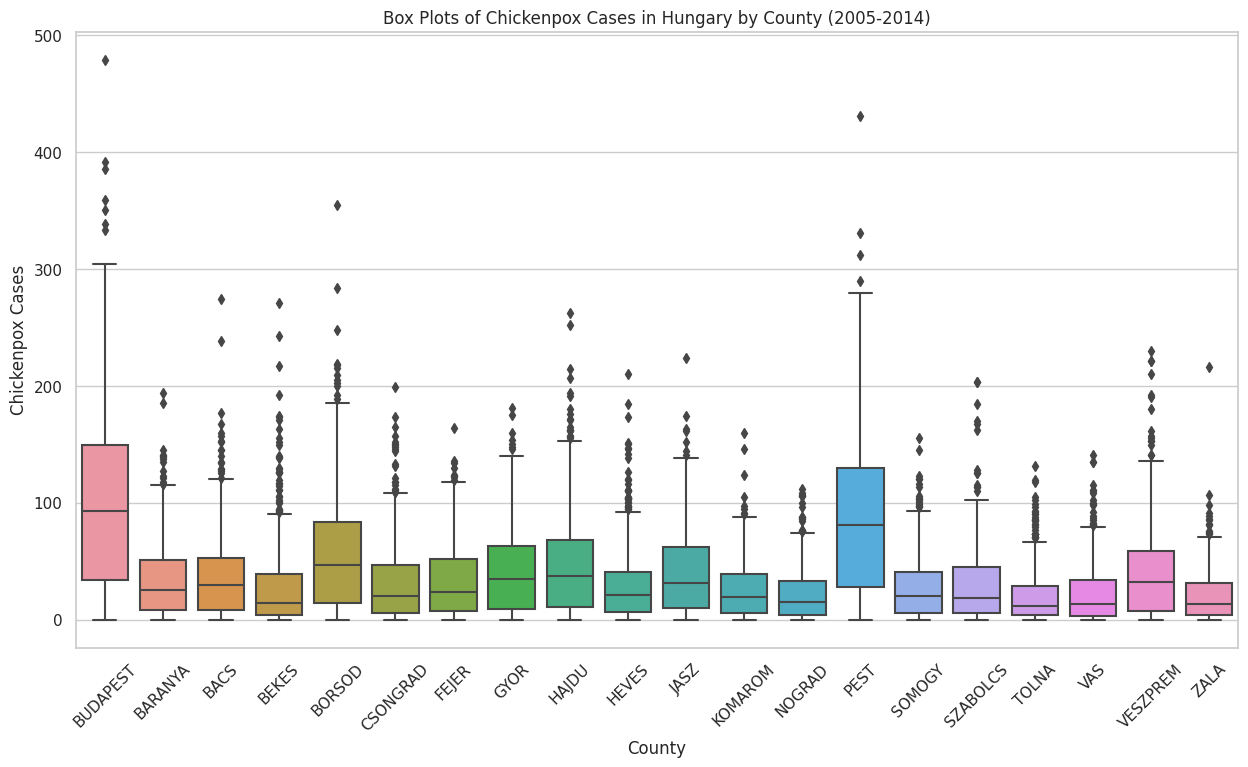

In [8]:
# Creating box plots for each county
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.drop(columns='Total'))
plt.title('Box Plots of Chickenpox Cases in Hungary by County (2005-2014)')
plt.xlabel('County')
plt.ylabel('Chickenpox Cases')
plt.xticks(rotation=45)
plt.show()


**Summary of EDA**
* The dataset consists of weekly chickenpox case counts across various counties in Hungary from 2005 to 2014.
* There is a clear seasonal pattern in the data, with annual peaks in chickenpox cases.
* Budapest consistently has a higher number of cases compared to other counties.
* There are several outliers in the dataset, which could be explored further for anomaly detection.

Data Preprocessing

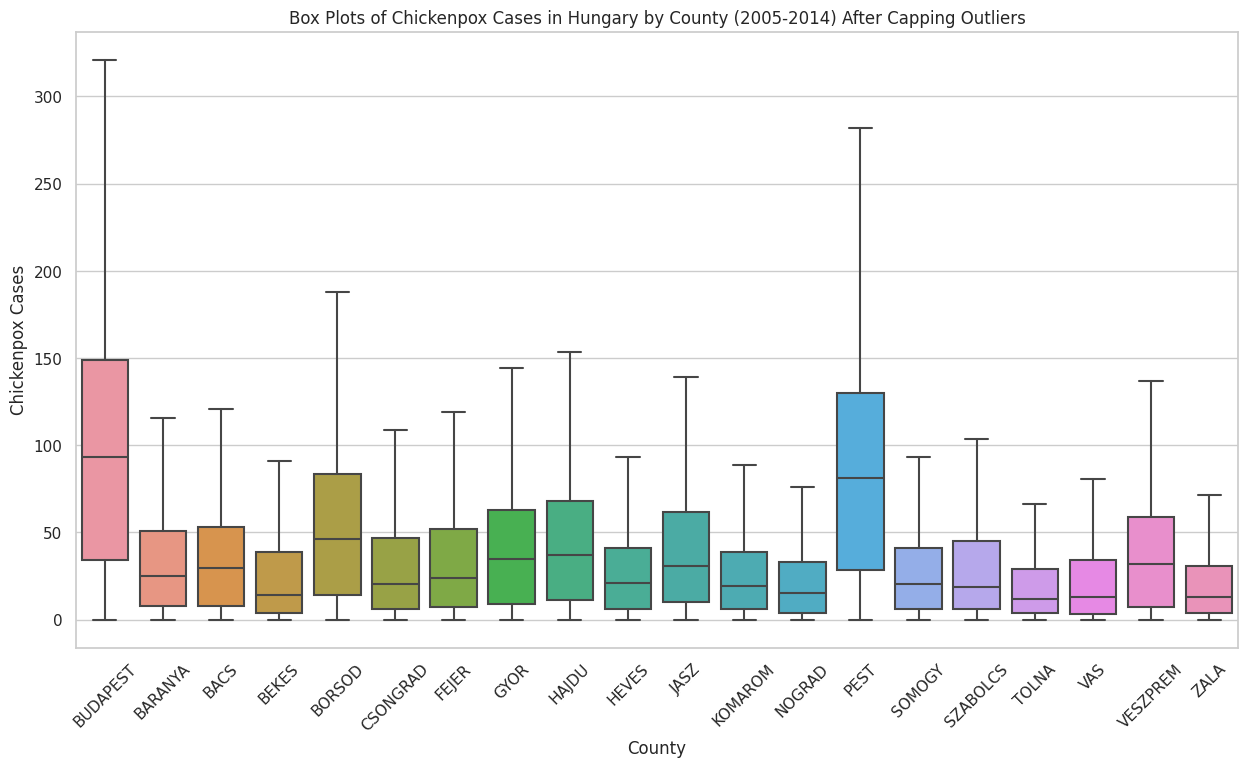

In [9]:
# Function to cap outliers based on IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    series[series < lower_bound] = lower_bound
    series[series > upper_bound] = upper_bound
    return series

# Apply the function to cap outliers in each county
data_capped = data.apply(lambda col: cap_outliers(col) if col.name != 'Date' else col)

# Show the box plots after capping outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_capped.drop(columns='Total'))
plt.title('Box Plots of Chickenpox Cases in Hungary by County (2005-2014) After Capping Outliers')
plt.xlabel('County')
plt.ylabel('Chickenpox Cases')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Calculate total chickenpox cases for each week
data_capped['Total'] = data_capped.sum(axis=1)

# Identify weeks with unusually low total chickenpox cases
low_case_threshold = data_capped['Total'].quantile(0.01)  # 1% quantile as the threshold
weeks_with_low_cases = data_capped[data_capped['Total'] <= low_case_threshold]

weeks_with_low_cases


,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,...,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Total
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-10,6.0,1.0,2.0,2.0,3,0.0,3.0,3,1.0,3.0,...,1.0,4.0,2,0.0,0.0,0.0,1.0,4.0,1.0,74.0
2008-08-18,3.0,0.0,1.0,1.0,4,1.0,1.0,4,1.0,2.0,...,4.0,0.0,4,1.0,1.0,1.0,3.0,2.0,0.0,70.0
2009-08-17,7.0,1.0,0.0,3.0,4,3.0,0.0,6,0.0,4.0,...,1.0,1.0,1,1.0,1.0,0.0,0.0,1.0,4.0,76.0
2012-08-20,3.0,0.0,4.0,0.0,2,0.0,1.0,5,0.0,0.0,...,0.0,1.0,7,0.0,1.0,0.0,0.0,0.0,0.0,54.0
2012-08-27,0.0,0.0,0.0,1.0,3,0.0,0.0,3,1.0,0.0,...,0.0,0.0,3,0.0,6.0,0.0,8.0,0.0,4.0,66.0
2013-12-23,6.0,3.0,0.0,0.0,3,0.0,1.0,0,3.0,1.0,...,0.0,0.0,10,0.0,3.0,4.0,0.0,2.0,2.0,76.0
2014-09-08,10.0,2.0,0.0,0.0,3,0.0,3.0,1,1.0,0.0,...,0.0,2.0,1,0.0,5.0,0.0,1.0,5.0,0.0,72.0


In [11]:
# Resetting index to access the "Date" information
data_capped.reset_index(inplace=True)

# Creating additional time-based features
data_capped['Week_of_Year'] = data_capped['Date'].dt.isocalendar().week
data_capped['Month'] = data_capped['Date'].dt.month
data_capped['Year'] = data_capped['Date'].dt.year

# Show the first few rows to confirm the new features are added
data_capped.head()


,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Total,Week_of_Year,Month,Year
0,2005-01-03,168.0,79.0,30.0,90.875,169,42.0,118.875,120,153.5,...,66.0,64.0,11.0,29.0,87.0,68.0,3506.250,1,1,2005
1,2005-01-10,157.0,60.0,30.0,90.875,188,53.0,51.000,70,84.0,...,48.0,29.0,58.0,53.0,68.0,26.0,2800.875,2,1,2005
2,2005-01-17,96.0,44.0,31.0,86.000,93,30.0,93.000,84,153.5,...,33.0,33.0,24.0,18.0,62.0,44.0,2530.500,3,1,2005
3,2005-01-24,163.0,49.0,43.0,90.875,46,39.0,52.000,114,107.0,...,66.0,50.0,25.0,21.0,43.0,31.0,2474.875,4,1,2005
4,2005-01-31,122.0,78.0,53.0,87.000,103,34.0,95.000,131,153.5,...,63.0,56.0,7.0,47.0,85.0,60.0,2937.500,5,1,2005


Feature Selection

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


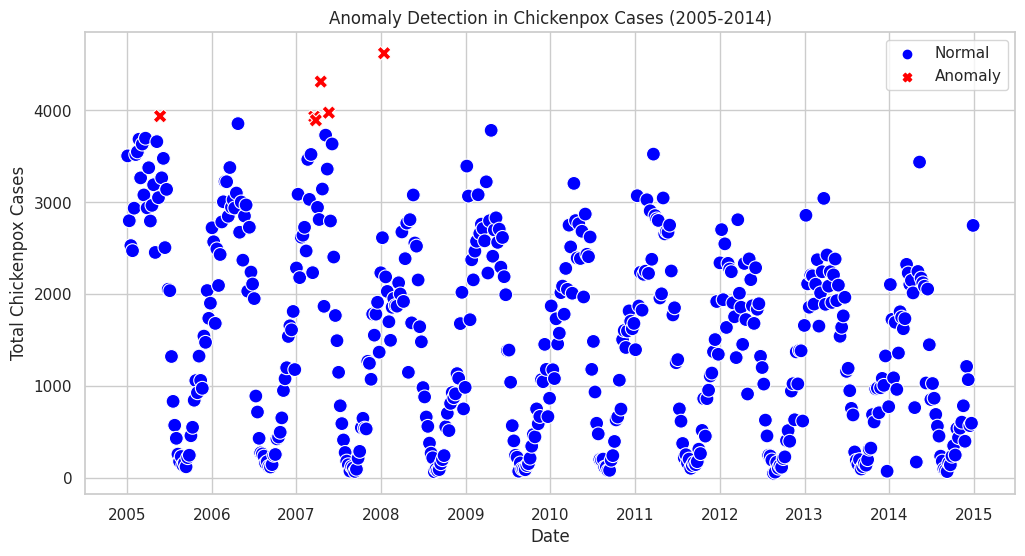

,Date,Total
20,2005-05-23,3938.500
115,2007-03-19,3931.875
116,2007-03-26,3893.375
119,2007-04-16,4314.250
124,2007-05-21,3976.250
158,2008-01-14,4622.750


In [12]:
from sklearn.ensemble import IsolationForest

# Preparing the data for anomaly detection
X = data_capped[['Total']]

# Applying Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)  # 1% contamination means we expect 1% of the data to be outliers
anomalies = model.fit_predict(X)
data_capped['Anomaly'] = anomalies

# Mapping the anomaly detection results to a more readable format
data_capped['Anomaly'] = data_capped['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Visualizing the results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_capped, x='Date', y='Total', hue='Anomaly', style='Anomaly', palette={'Normal': 'blue', 'Anomaly': 'red'}, markers={'Normal': 'o', 'Anomaly': 'X'}, s=100)
plt.title('Anomaly Detection in Chickenpox Cases (2005-2014)')
plt.xlabel('Date')
plt.ylabel('Total Chickenpox Cases')
plt.legend()
plt.show()

# Showing the weeks identified as anomalies
anomalies_detected = data_capped[data_capped['Anomaly'] == 'Anomaly']
anomalies_detected[['Date', 'Total']]


**Observations**
* The Isolation Forest algorithm has flagged several weeks as anomalies, where the total chickenpox cases across all counties were unusually high.
* These anomalies are spread across different years, indicating that these are not isolated incidents.

In [13]:
from sklearn.model_selection import train_test_split

# Define the classes based on the distribution of total chickenpox cases
thresholds = {
    'Low': data_capped['Total'].quantile(0.33),
    'Medium': data_capped['Total'].quantile(0.66)
}
data_capped['Class'] = pd.cut(data_capped['Total'],
                              bins=[-float('inf'), thresholds['Low'], thresholds['Medium'], float('inf')],
                              labels=['Low', 'Medium', 'High'])

# Select relevant features for the classification task
features = ['Week_of_Year', 'Month', 'Year']
X = data_capped[features]
y = data_capped['Class']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the first few rows of the training set and the class distribution
X_train.head(), y_train.value_counts(normalize=True)


(     Week_of_Year  Month  Year
 220            13      3  2009
 69             18      5  2006
 374            10      3  2012
 305            45     11  2010
 173            18      4  2008,
 Medium    0.345324
 Low       0.330935
 High      0.323741
 Name: Class, dtype: float64)

In [21]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=216119678fcefd83da18c32dbef4a4ba10c58735437117fa8db84d9fb08f3dce
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [26]:
import h2o
h2o.init()

hf = h2o.H2OFrame(pd.DataFrame(data_capped))
train, valid, test = hf.split_frame(ratios=[0.7, 0.15], seed=42)



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,"7 days, 10 hours and 24 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_qynb6a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [27]:
from h2o.automl import H2OAutoML

y = "Total"
x = train.columns
x.remove(y)

aml = H2OAutoML(max_models=20, max_runtime_secs=600, seed=42)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
20:51:32.71: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/20
# GBM base models (used / total),1/7
# XGBoost base models (used / total),1/6
# DeepLearning base models (used / total),2/4
# DRF base models (used / total),0/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [28]:
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))


model_id                                                     rmse        mse       mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231023_205132      88.1114    7763.62   63.321     0.118424                   7763.62
StackedEnsemble_BestOfFamily_1_AutoML_1_20231023_205132   91.4823    8369.02   65.7209    0.128834                   8369.02
GBM_grid_1_AutoML_1_20231023_205132_model_2              150.72     22716.5   104.1       0.116429                  22716.5
DeepLearning_grid_2_AutoML_1_20231023_205132_model_1     152.339    23207.2   115.226     0.212281                  23207.2
GBM_2_AutoML_1_20231023_205132                           152.695    23315.9   105.485     0.122484                  23315.9
DeepLearning_grid_1_AutoML_1_20231023_205132_model_1     153.965    23705.3   121.992   nan                         23705.3
GBM_3_AutoML_1_20231023_205132                           155.676    24235.1   106.098     0.119983                  24235.1
GBM_4

In [29]:
preds = aml.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_BestOfFamily_1_AutoML_1_20231023_205132,88.1504,7770.5,68.7952,0.135966,7770.5,1531,0.349338,StackedEnsemble,3244.68
StackedEnsemble_AllModels_1_AutoML_1_20231023_205132,88.5897,7848.14,72.2693,0.292824,7848.14,2084,0.185588,StackedEnsemble,3175.14
GBM_2_AutoML_1_20231023_205132,119.293,14230.8,85.2236,0.133197,14230.8,950,0.039426,GBM,3089.19
GBM_3_AutoML_1_20231023_205132,123.435,15236.3,86.9084,0.170451,15236.3,632,0.040003,GBM,3131.32
GBM_grid_1_AutoML_1_20231023_205132_model_1,127.93,16366.2,97.5278,0.167458,16366.2,1069,0.033248,GBM,3236.93
GBM_grid_1_AutoML_1_20231023_205132_model_2,129.586,16792.5,92.509,0.157927,16792.5,819,0.049705,GBM,3027.01
GBM_4_AutoML_1_20231023_205132,136.431,18613.4,92.89,0.167777,18613.4,1257,0.048987,GBM,3101.37
DeepLearning_grid_3_AutoML_1_20231023_205132_model_1,138.324,19133.6,99.5289,0.16399,19133.6,23462,0.014507,DeepLearning,3353.83
DRF_1_AutoML_1_20231023_205132,139.988,19596.7,103.769,0.212611,19596.7,1290,0.032023,DRF,3105.02
GBM_5_AutoML_1_20231023_205132,145.313,21115.9,103.345,0.184313,21115.9,1103,0.036027,GBM,3072.6


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

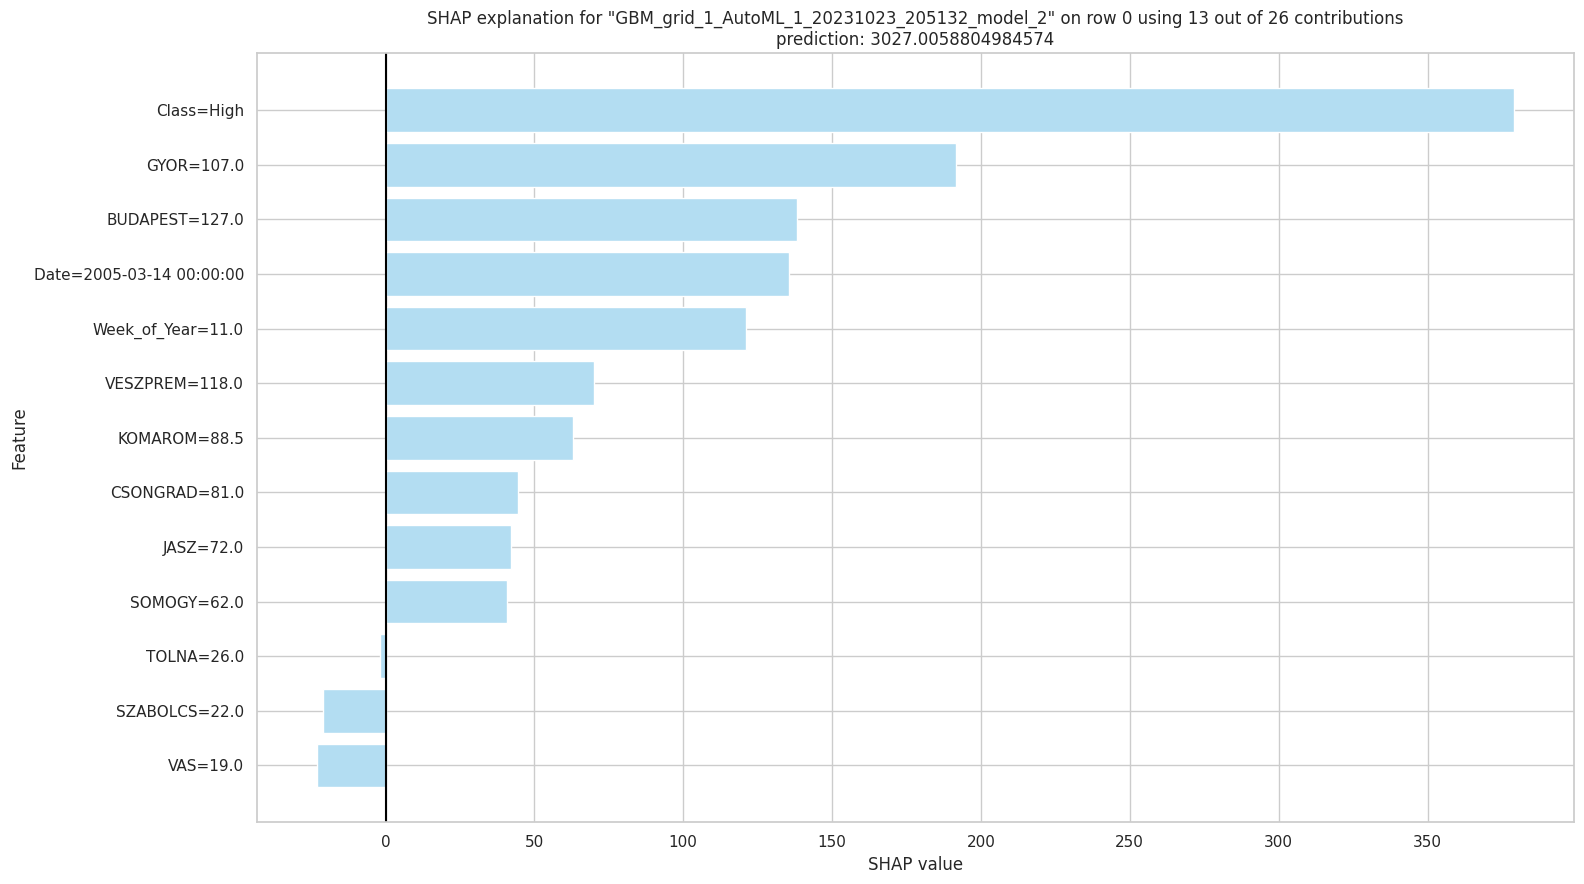

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_BestOfFamily_1_AutoML_1_20231023_205132,88.1504,7770.5,68.7952,0.135966,7770.5,1531,0.349338,StackedEnsemble,3244.68
StackedEnsemble_AllModels_1_AutoML_1_20231023_205132,88.5897,7848.14,72.2693,0.292824,7848.14,2084,0.185588,StackedEnsemble,3175.14
GBM_2_AutoML_1_20231023_205132,119.293,14230.8,85.2236,0.133197,14230.8,950,0.039426,GBM,3089.19
GBM_3_AutoML_1_20231023_205132,123.435,15236.3,86.9084,0.170451,15236.3,632,0.040003,GBM,3131.32
GBM_grid_1_AutoML_1_20231023_205132_model_1,127.93,16366.2,97.5278,0.167458,16366.2,1069,0.033248,GBM,3236.93
GBM_grid_1_AutoML_1_20231023_205132_model_2,129.586,16792.5,92.509,0.157927,16792.5,819,0.049705,GBM,3027.01
GBM_4_AutoML_1_20231023_205132,136.431,18613.4,92.89,0.167777,18613.4,1257,0.048987,GBM,3101.37
DeepLearning_grid_3_AutoML_1_20231023_205132_model_1,138.324,19133.6,99.5289,0.16399,19133.6,23462,0.014507,DeepLearning,3353.83
DRF_1_AutoML_1_20231023_205132,139.988,19596.7,103.769,0.212611,19596.7,1290,0.032023,DRF,3105.02
GBM_5_AutoML_1_20231023_205132,145.313,21115.9,103.345,0.184313,21115.9,1103,0.036027,GBM,3072.6


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

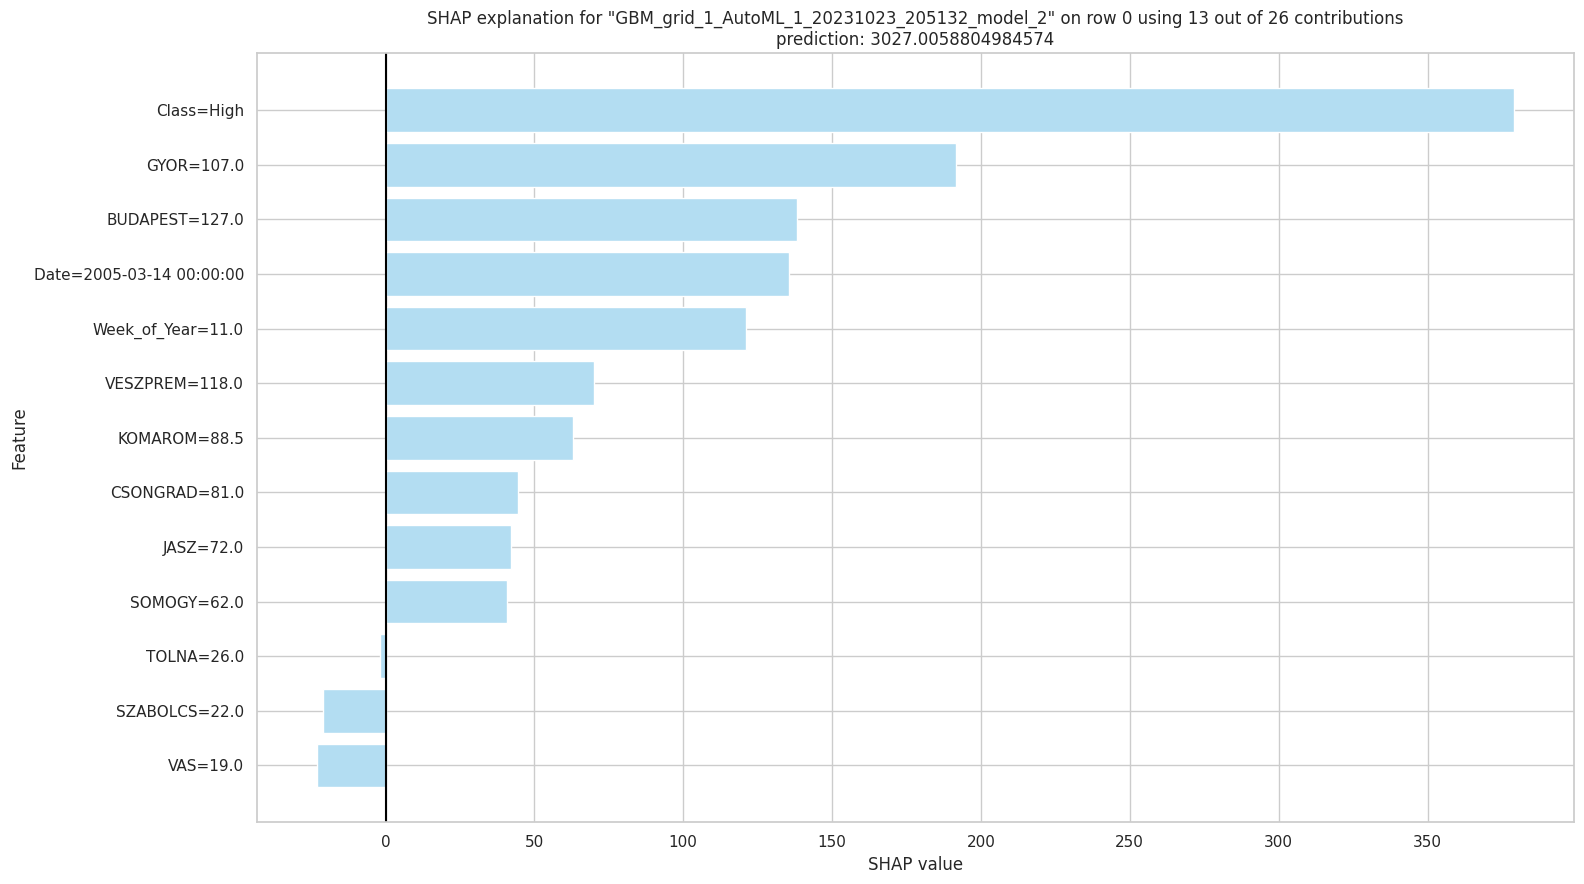

In [30]:
aml.explain_row(test, row_index=0)